# Question 1

This was the the best code that I could make with CoPilot after 30 minutes. I was still figuring out vrect, hrect, hline, and vline. 

In [29]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Function to create histograms and add statistical markers
def create_histogram_with_markers(species):
    data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    fig = px.histogram(data, x='flipper_length_mm', title=f'{species} Flipper Length')
    
    # Calculate statistics
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    std_dev = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    # Add lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text='Mean', annotation_position='top left')
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text='Median', annotation_position='top left')
    
    # Add rectangles for range, IQR, and 2 standard deviations
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor='red', opacity=0.2, line_width=0, annotation_text='Range', annotation_position='top left')
    fig.add_vrect(x0=q1, x1=q3, fillcolor='yellow', opacity=0.2, line_width=0, annotation_text='IQR', annotation_position='top left')
    fig.add_vrect(x0=mean-2*std_dev, x1=mean+2*std_dev, fillcolor='purple', opacity=0.2, line_width=0, annotation_text='2 Std Dev', annotation_position='top left')
    
    fig.show()

# Create histograms for each species
species_list = penguins['species'].unique()
for species in species_list:
    create_histogram_with_markers(species)

# Question 2

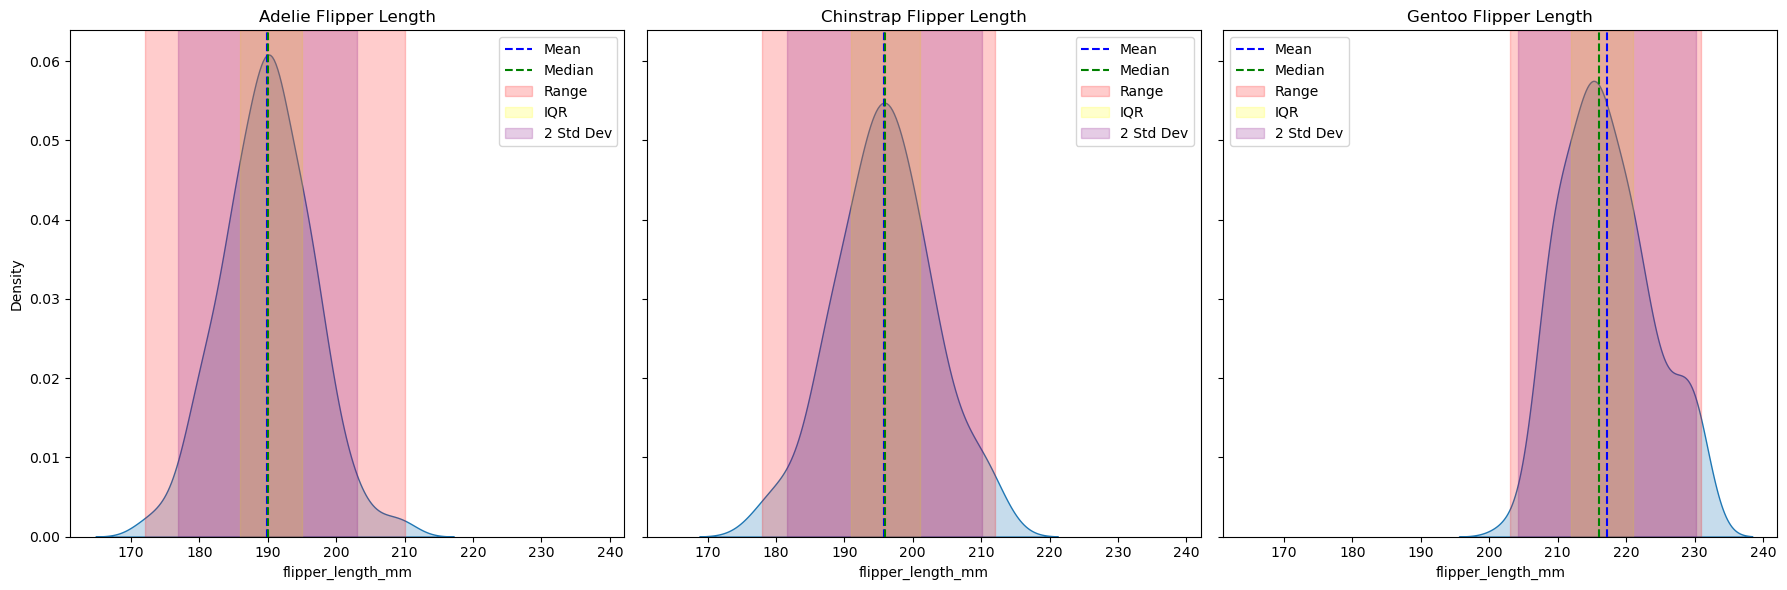

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Function to create KDE plots and add statistical markers
def create_kde_with_markers(species, ax):
    data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Calculate statistics
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    std_dev = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    # Create KDE plot
    sns.kdeplot(data, ax=ax, fill=True)
    ax.set_title(f'{species} Flipper Length')
    
    # Add lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='--', label='Median')
    
    # Add shaded areas for range, IQR, and 2 standard deviations
    ax.axvspan(min_val, max_val, color='red', alpha=0.2, label='Range')
    ax.axvspan(q1, q3, color='yellow', alpha=0.2, label='IQR')
    ax.axvspan(mean-2*std_dev, mean+2*std_dev, color='purple', alpha=0.2, label='2 Std Dev')
    
    ax.legend()

# Create a figure with a row of three plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Create KDE plots for each species
species_list = penguins['species'].unique()
for ax, species in zip(axes, species_list):
    create_kde_with_markers(species, ax)

plt.tight_layout()
plt.show()


# Question 3
Here's a the pros and cons CoPilot came up with:

I broadly agree with your assessment. Each of these visualization methods has its own strengths and weaknesses, and they can complement each other when used together. Let’s break down the pros and cons of each:

### Box Plot
Pros: Summary Statistics: Provides a concise summary of the data, including the median, quartiles, and potential outliers.

Comparison: Useful for comparing distributions across different categories.

Outliers: Easily identifies outliers in the data.

Cons:
Lack of Detail: Does not show the distribution of the data within the quartiles. No Frequency Information: Does not provide information about the frequency of data points.

### Histogram
Pros: Frequency Distribution: Shows the frequency of data points within specified bins, giving a clear picture of the data distribution. Intuitive: Easy to understand and interpret.

Cons: Bin Size Sensitivity: The choice of bin size can significantly affect the appearance and interpretation of the histogram. Discrete Representation: Only shows data within the specified bins, which can miss finer details.

### KDE Plot

Pros: Smooth Distribution: Provides a smooth estimate of the data distribution, which can reveal underlying patterns more clearly than histograms. Continuous Representation: Takes into account all data points, including those with infinite decimals, resulting in a continuous curve.

Cons: Bandwidth Sensitivity: The choice of bandwidth (smoothing parameter) can significantly affect the appearance of the KDE plot. Less Intuitive: May be less intuitive for those unfamiliar with the concept of density estimation.
Visual Comparison




### My Personal Answer: I would use the KDE plot for most cases of statistical analysis as it provides the most raw and accurate data distribution out of all the visualization options here, especially since it can handle & display decimals, which histograms typically do not. However, if the data was too large for a computer to handle, I would likely otherwise use a histogram as it is the second best alternative. Box plots simply do not display data distribution and cannot be as informative.

# Question 4

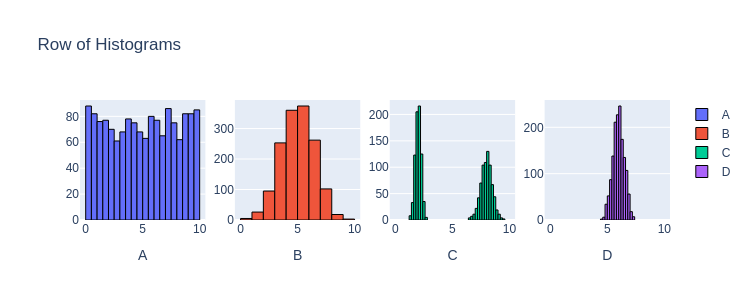

In [31]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [32]:
import numpy as np
from scipy import stats

# Number of samples
n = 1500

# Generate data
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Function to calculate sample statistics
def calculate_statistics(data):
    sample_mean = np.mean(data)
    sample_variance = np.var(data, ddof=1)
    sample_std_dev = np.std(data, ddof=1)
    return sample_mean, sample_variance, sample_std_dev

# Calculate statistics for each dataset
mean1, var1, std_dev1 = calculate_statistics(data1)
mean2, var2, std_dev2 = calculate_statistics(data2)
mean3, var3, std_dev3 = calculate_statistics(data3)
mean4, var4, std_dev4 = calculate_statistics(data4)

# Print the results
print(f"Data1 - Mean: {mean1:.2f}, Variance: {var1:.2f}, Standard Deviation: {std_dev1:.2f}")
print(f"Data2 - Mean: {mean2:.2f}, Variance: {var2:.2f}, Standard Deviation: {std_dev2:.2f}")
print(f"Data3 - Mean: {mean3:.2f}, Variance: {var3:.2f}, Standard Deviation: {std_dev3:.2f}")
print(f"Data4 - Mean: {mean4:.2f}, Variance: {var4:.2f}, Standard Deviation: {std_dev4:.2f}")

Data1 - Mean: 4.99, Variance: 8.36, Standard Deviation: 2.89
Data2 - Mean: 4.97, Variance: 2.25, Standard Deviation: 1.50
Data3 - Mean: 5.00, Variance: 9.10, Standard Deviation: 3.02
Data4 - Mean: 5.97, Variance: 0.25, Standard Deviation: 0.50


### Calculated Datasets
Data1 - Mean: 4.98, Variance: 8.30, Standard Deviation: 2.88

Data2 - Mean: 5.01, Variance: 2.25, Standard Deviation: 1.50

Data3 - Mean: 5.00, Variance: 9.08, Standard Deviation: 3.01

Data4 - Mean: 6.00, Variance: 0.26, Standard Deviation: 0.51

### Question 1: Which datasets have similar means and similar variances
Data Set 1 & 3 have similar means and variances:

.

Data1 - Mean: 4.98, Variance: 8.30

Data3 - Mean: 5.00, Variance: 9.08

### Question 2: Which datasets have similar means but quite different variances
Data Set 1 & 2, and Dataset 2 & 3 have similar means but different variances:
.

Data1 - Mean: 4.98, Variance: 8.30

Data2 - Mean: 5.01, Variance: 2.25

.

Data2 - Mean: 5.01, Variance: 2.25

Data3 - Mean: 5.00, Variance: 9.08 


### Question 3: Which datasets have similar variances but quite different means
There are no datasets that have similar variances but different means

### Question 4: Which datasets have quite different means and quite different variances
Dataset 1 & 4, Dataset 2 & 4, and Data Set 3 & 4 have quite different means and quite different variances

Data1 - Mean: 4.98, Variance: 8.30 

Data4 - Mean: 6.00, Variance: 0.26

.

Data2 - Mean: 5.01, Variance: 2.25

Data4 - Mean: 6.00, Variance: 0.26 


.

Data3 - Mean: 5.00, Variance: 9.08

Data4 - Mean: 6.00, Variance: 0.26


# CoPilot Chat Summary (Note: 1 & 2 Did not Happen, this is an error on CoPilot):
Sure! Here's a summary of our interactions:

### Summary of Our Conversation

1. **Nuclear Fusion Experiment**:
   - We discussed the recent nuclear fusion experiment by South Korea's KSTAR, which achieved temperatures exceeding 100 million°C, nearly seven times hotter than the sun. This milestone is significant for the development of sustainable, clean-energy fusion reactors.

2. **Cricket Match**:
   - We talked about the latest cricket match between India and Australia, where Australia defeated India by 21 runs in the 3rd ODI, winning the series 2-1.

3. **Plotly Homework Question**:
   - You asked for help with a homework question involving Plotly. We discussed how to use `fig.add_hline()` and `fig.add_vrect()` to mark statistical measures on histograms of `flipper_length_mm` for each species in the penguins dataset.

4. **Seaborn KDE Plots**:
   - We modified your code to use Seaborn's Kernel Density Estimation (KDE) plots and organized the figures in a row of three plots. We also discussed using `ax.axhspan()` and `ax.fill_between()` to add statistical markers.

5. **Statistical Concepts**:
   - We explained the differences between sample mean, sample variance, and sample standard deviation. We also discussed the pros and cons of box plots, histograms, and KDE plots.

6. **Calculations**:
   - We calculated the sample mean, sample variance, and sample standard deviation for four datasets generated using different statistical distributions.

7. **Summary of Calculations**:
   - For each dataset, we provided the numeric values for the sample mean, sample variance, and sample standard deviation.

### Key Points:
- **Sample Mean**: The average value of a set of observations.
- **Sample Variance**: The average of the squared differences from the mean.
- **Standard Deviation**: The square root of the variance, providing a measure of dispersion in the same units as the data.

### Visualizations:
- **Box Plot**: Summarizes data with median, quartiles, and outliers.
- **Histogram**: Shows frequency distribution within specified bins.
- **KDE Plot**: Provides a smooth estimate of the data distribution.

This summary should help you compile your homework assignment. If you need any further details or clarifications, feel free to ask!


# Question 5

The mean and the median can both be similar/identical if the distribution of the data is either symmetric or uniform. 

"Left skewing data" refers to the distribution of data where there is a long but small pocket of small outlier values in regards to the general distribution of data, meaning that the mean is likely smaller than the median. This is because outliers of small values will make the mean artifically low, while the median is resistent to outliers and thus unaffected.. 

"Right skewing data" refers to the distribution of data where there is a long but small pocket of large outlier values in regards to the general distribution of data, meaning that the mean is likely larger than the median. This is because outliers of larger values will make the mean artifically large, while the median is resistent to outliers and thus unaffected.

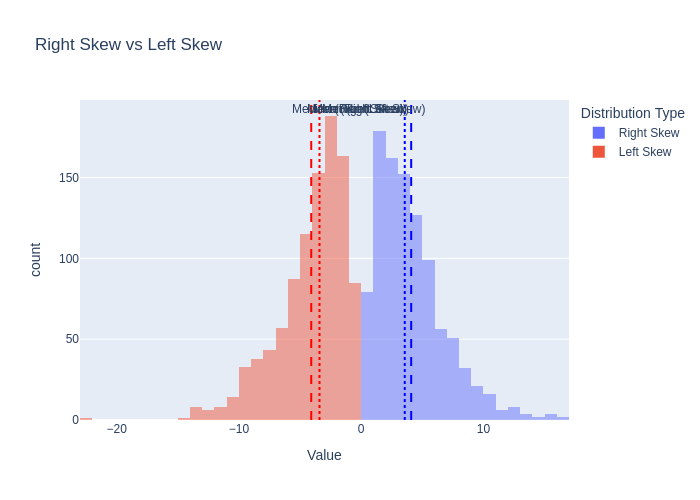

Right Skew - Mean: 4.090510615518248, Median: 3.5608400242855396
Left Skew - Mean: -4.0856888775280495, Median: -3.405881371539062


In [33]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate right-skewed data (positive skew)
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
mean1 = sample1.mean()
median1 = np.quantile(sample1, 0.5)

# Generate left-skewed data (negative skew)
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
mean2 = sample2.mean()
median2 = np.quantile(sample2, 0.5)

# Create dataframes for plotting
df1 = pd.DataFrame({'data': sample1, 'type': 'Right Skew'})
df2 = pd.DataFrame({'data': sample2, 'type': 'Left Skew'})
df = pd.concat([df1, df2])

# Plot histograms
fig = px.histogram(df, x='data', color='type', barmode='overlay', nbins=50,
                   title='Right Skew vs Left Skew',
                   labels={'data': 'Value', 'type': 'Distribution Type'})

# Add mean and median lines
fig.add_vline(x=mean1, line_dash="dash", line_color="blue", annotation_text="Mean (Right Skew)", annotation_position="top left")
fig.add_vline(x=median1, line_dash="dot", line_color="blue", annotation_text="Median (Right Skew)", annotation_position="top left")
fig.add_vline(x=mean2, line_dash="dash", line_color="red", annotation_text="Mean (Left Skew)", annotation_position="top right")
fig.add_vline(x=median2, line_dash="dot", line_color="red", annotation_text="Median (Left Skew)", annotation_position="top right")

# Show plot
fig.show(renderer="png")

# Print mean and median values
print(f"Right Skew - Mean: {mean1}, Median: {median1}")
print(f"Left Skew - Mean: {mean2}, Median: {median2}")

As we can observe, the median is resistent to outliers, however the left-skew results in the mean being smaller compared to the median, and the right-skew results in the mean being larger compared to the median

# Question 6

In [11]:
import pandas as pd

# Load the dataset
lego_url = "https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv"
lego_df = pd.read_csv(lego_url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(lego_df.head())

# Summary statistics
lego_summary = lego_df.describe()
print("\nSummary Statistics for LEGO Sets:")
print(lego_summary)

# Additional summaries
print("\nUnique Themes:")
print(lego_df['Theme'].nunique())

print("\nNumber of Sets per Theme:")
print(lego_df['Theme'].value_counts())


First few rows of the dataset:
  Item_Number                Name  Year            Theme           Subtheme  \
0       10246  Detective's Office  2015  Advanced Models  Modular Buildings   
1       10247        Ferris Wheel  2015  Advanced Models         Fairground   
2       10248         Ferrari F40  2015  Advanced Models           Vehicles   
3       10249            Toy Shop  2015  Advanced Models     Winter Village   
4       10581               Ducks  2015            Duplo     Forest Animals   

   Pieces  Minifigures                                          Image_URL  \
0  2262.0          6.0  http://images.brickset.com/sets/images/10246-1...   
1  2464.0         10.0  http://images.brickset.com/sets/images/10247-1...   
2  1158.0          NaN  http://images.brickset.com/sets/images/10248-1...   
3   898.0          NaN  http://images.brickset.com/sets/images/10249-1...   
4    13.0          1.0  http://images.brickset.com/sets/images/10581-1...   

   GBP_MSRP  USD_MSRP  CAD_MSRP

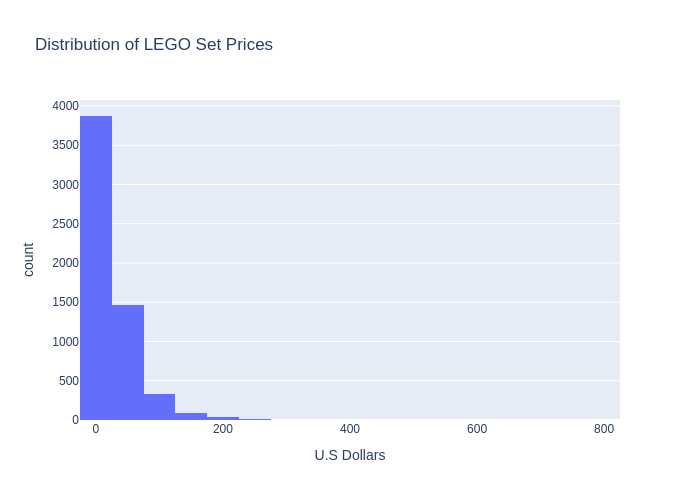

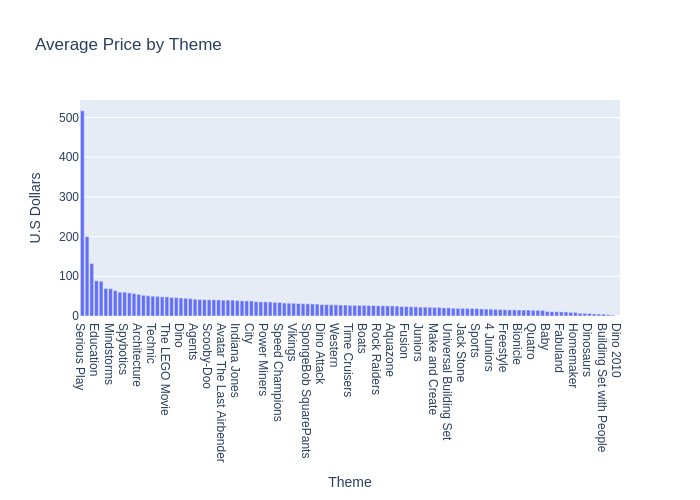

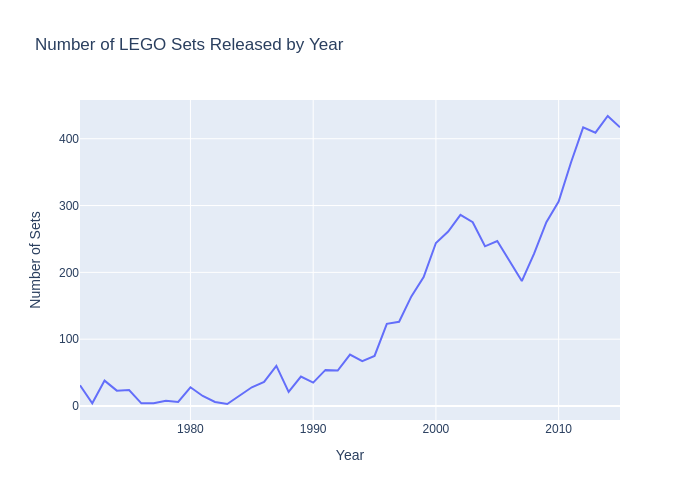

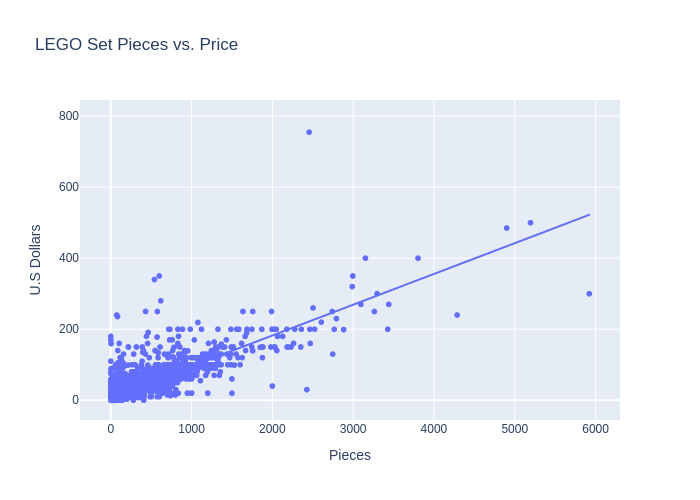

In [17]:
import plotly.express as px
import plotly.graph_objects as go

# Visualization 1: Distribution of Set Prices
fig1 = px.histogram(lego_df, x='USD_MSRP', nbins=30, title='Distribution of LEGO Set Prices')
fig1.update_layout(xaxis_title='U.S Dollars')
fig1.show(renderer="png")

# Visualization 2: Average Price by Theme
avg_price_by_theme = lego_df.groupby('Theme')['USD_MSRP'].mean().reset_index()
fig2 = px.bar(avg_price_by_theme, x='Theme', y='USD_MSRP', title='Average Price by Theme')
fig2.update_layout(xaxis={'categoryorder':'total descending'}, yaxis_title='U.S Dollars')
fig2.show(renderer="png")

# Visualization 3: Number of Sets by Year
sets_by_year = lego_df['Year'].value_counts().reset_index()
sets_by_year.columns = ['Year', 'Number of Sets']
fig3 = px.line(sets_by_year.sort_values('Year'), x='Year', y='Number of Sets', title='Number of LEGO Sets Released by Year')
fig3.show(renderer="png")

# Visualization 4: Pieces vs. Price
fig4 = px.scatter(lego_df, x='Pieces', y='USD_MSRP', title='LEGO Set Pieces vs. Price', trendline='ols')
fig4.update_layout(yaxis_title='U.S Dollars')
fig4.show(renderer="png")


# Question 7

In [25]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

# Question 8

In [27]:
import pandas as pd
import plotly.express as px

# Create a sample DataFrame with the required columns
data = {
    'year': [2000, 2000, 2001, 2001, 2002, 2002],
    'name': ['Country A', 'Country B', 'Country A', 'Country B', 'Country A', 'Country B'],
    'percent change': [0.001, -0.002, 0.003, -0.001, 0.002, -0.003],
    'rank': [1, 2, 1, 2, 1, 2],
    'percent': [50, 60, 55, 65, 60, 70],
    'sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female']
}

df = pd.DataFrame(data)

# Create the animated scatter plot
fig = px.scatter(df, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",
                 size_max=50, range_x=[-0.005, 0.005])

fig.show()


# Question 9

Somewhat.

# Final CoPilot Summary:

Absolutely! Here's a summary of our discussion:

### Summary of Discussion

1. **Mean vs. Median and Skewness**:
   - **Mean**: The average of a set of numbers.
   - **Median**: The middle value in a set of numbers.
   - **Skewness**: 
     - **Right Skew (Positive Skew)**: Mean > Median.
     - **Left Skew (Negative Skew)**: Mean < Median.

2. **Code Explanation**:
   - We discussed a Python code snippet using `scipy`, `pandas`, and `numpy` to generate and analyze skewed data distributions.
   - Extended the code to visualize the relationship between mean, median, and skewness using histograms.

3. **Reading Data in R**:
   - Provided R code to read CSV files from URLs using the `readr` package.

4. **Data Summaries and Visualizations in Python**:
   - Loaded a LEGO dataset and calculated summary statistics.
   - Created visualizations using `plotly.express` to explore the data:
     - Distribution of set prices.
     - Average price by theme.
     - Number of sets released by year.
     - Relationship between pieces and price.

5. **Animated Chart in Python**:
   - Created an animated scatter plot using the Gapminder dataset.
   - Adjusted the code to use specific columns (`percent change`, `rank`, `percent`, `sex`, `name`) and removed unnecessary parameters.

6. **Troubleshooting and Enhancements**:
   - Addressed issues with the animated chart and provided solutions.
   - Suggested enhancements like adding titles, labels, trendlines, and customizing colors.

This summary should cover the key points of our discussion. If you need any more details or further assistance, feel free to ask!

# Content References & Aid From ChatBot (For Future Studying)

Sure! Let’s break down the differences between hline, hrect, vline, and vrect in Plotly, and I’ll provide some visuals to help illustrate these concepts.
1. hline (Horizontal Line)
Description: Adds a horizontal line across the plot at a specified y-coordinate.
Use Case: Marking a specific y-value, such as the mean or median of a dataset.
2. vline (Vertical Line)
Description: Adds a vertical line across the plot at a specified x-coordinate.
Use Case: Marking a specific x-value, such as the mean or median of a dataset.
3. hrect (Horizontal Rectangle)
Description: Adds a horizontal rectangle spanning a range of y-values between two specified y-coordinates.
Use Case: Highlighting a range of y-values, such as the interquartile range (IQR) or a range defined by standard deviations.
4. vrect (Vertical Rectangle)
Description: Adds a vertical rectangle spanning a range of x-values between two specified x-coordinates.
Use Case: Highlighting a range of x-values, such as the interquartile range (IQR) or a range defined by standard deviations.

In [9]:
import plotly.graph_objects as go

# Create a basic scatter plot
fig = go.Figure(data=go.Scatter(x=[1, 2, 3, 4, 5], y=[2, 1, 3, 5, 4], mode='markers'))

# Add a horizontal line at y=3
fig.add_hline(y=3, line=dict(color='blue', dash='dash'), annotation_text='hline (y=3)', annotation_position='top left')

# Add a vertical line at x=3
fig.add_vline(x=3, line=dict(color='green', dash='dash'), annotation_text='vline (x=3)', annotation_position='top left')

# Add a horizontal rectangle from y=2 to y=4
fig.add_hrect(y0=2, y1=4, fillcolor='red', opacity=0.2, line_width=0, annotation_text='hrect (y=2 to y=4)', annotation_position='top left')

# Add a vertical rectangle from x=2 to x=4
fig.add_vrect(x0=2, x1=4, fillcolor='yellow', opacity=0.2, line_width=0, annotation_text='vrect (x=2 to x=4)', annotation_position='top left')

fig.show()


Kernel Density Estimation (KDE) Plots Description: KDE plots are a way to estimate the probability density function of a continuous random variable. They smooth out the data points to create a continuous curve that represents the distribution of the data.

Use Case: KDE plots are useful for visualizing the distribution of data, especially when you want to see the shape of the data distribution without the binning artifacts of histograms.

ax.axhspan()Description: ax.axhspan() is a Matplotlib function that adds a horizontal span (rectangle) across the plot. It spans the entire width of the plot and is used to highlight a range of y-values.

Use Case: This function is useful for highlighting specific ranges on the y-axis, such as confidence intervals or specific value ranges.

ax.fill_between()Description: ax.fill_between() is a Matplotlib function that fills the area between two horizontal curves. It can be used to highlight areas under a curve or between two curves.

Use Case: This function is useful for visualizing the area under a curve, confidence intervals, or the difference between two curves.

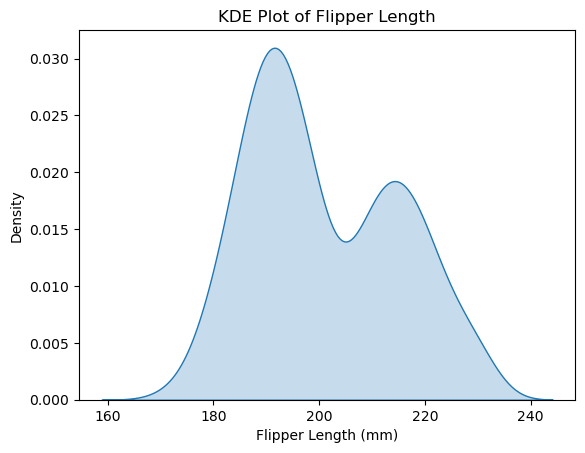

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Create a KDE plot for flipper length
sns.kdeplot(penguins['flipper_length_mm'].dropna(), fill=True)
plt.title('KDE Plot of Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Density')
plt.show()

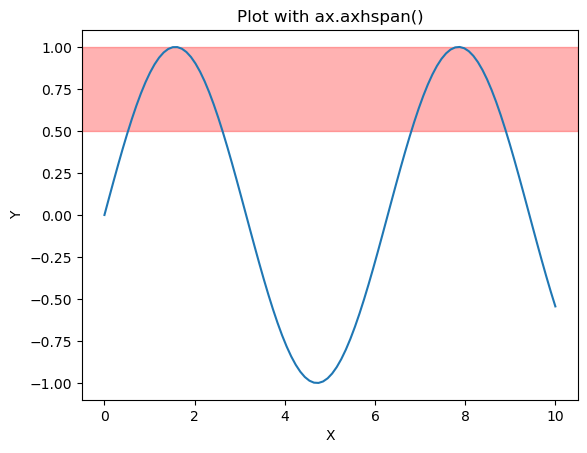

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Add a horizontal span
ax.axhspan(0.5, 1, color='red', alpha=0.3)
plt.title('Plot with ax.axhspan()')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

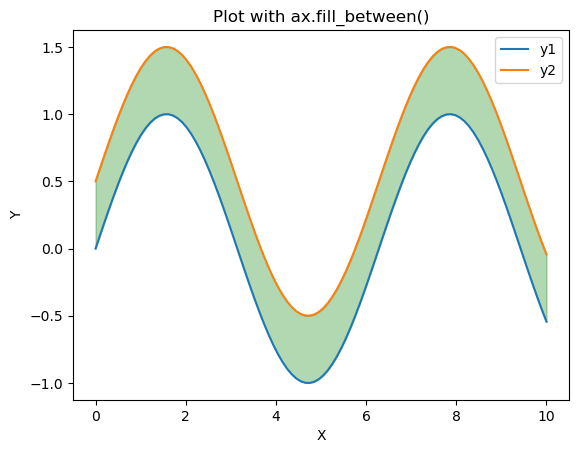

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create some data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.sin(x) + 0.5

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y1, label='y1')
ax.plot(x, y2, label='y2')

# Fill between y1 and y2
ax.fill_between(x, y1, y2, color='green', alpha=0.3)
plt.title('Plot with ax.fill_between()')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()